In [1]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

C:\Users\vmarq\AppData\Local\Temp\ipykernel_11640\183779410.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1372 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

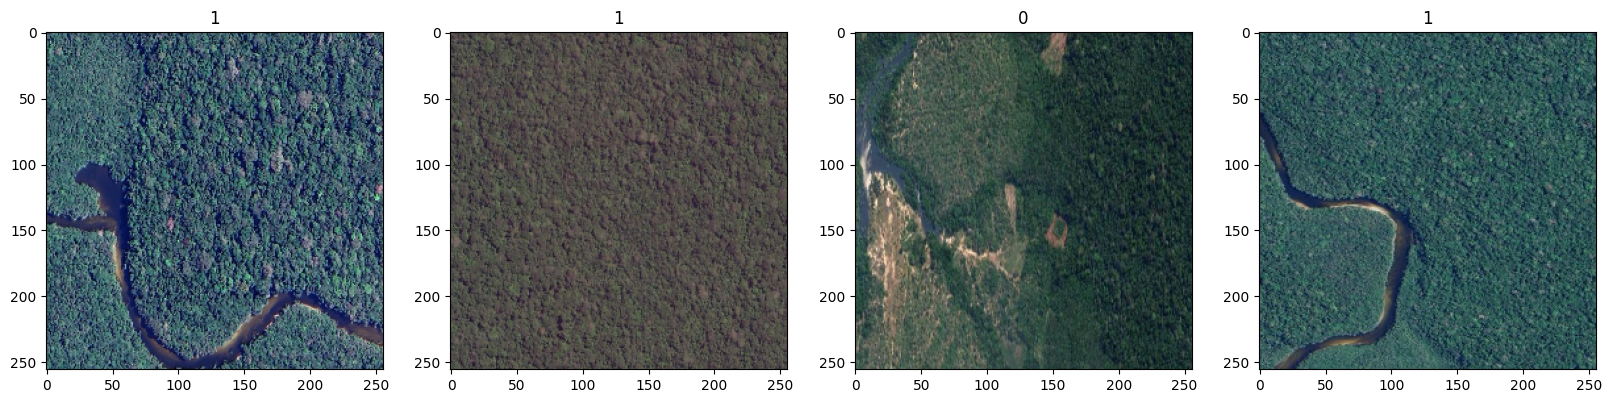

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[1.23935029e-01, 1.94102004e-01, 1.70572594e-01],
          [1.54814199e-01, 2.24981159e-01, 2.01451749e-01],
          [5.94269708e-02, 1.29593939e-01, 1.06064528e-01],
          ...,
          [5.15649796e-01, 3.94081116e-01, 3.11306924e-01],
          [5.63210011e-01, 4.41641361e-01, 3.58867139e-01],
          [5.12247860e-01, 3.90679210e-01, 3.07905018e-01]],
 
         [[5.39445467e-02, 1.15425855e-01, 9.70818028e-02],
          [1.06172912e-01, 1.67654231e-01, 1.49310172e-01],
          [2.18725845e-01, 2.80207127e-01, 2.61863083e-01],
          ...,
          [6.06546342e-01, 4.87635493e-01, 3.96045417e-01],
          [6.24845684e-01, 5.05934834e-01, 4.14344758e-01],
          [6.06747210e-01, 4.87836361e-01, 3.96246284e-01]],
 
         [[7.29060620e-02, 1.26076072e-01, 1.30288690e-01],
          [1.23952322e-01, 1.77731186e-01, 1.81943804e-01],
          [7.77161121e-02, 1.30511761e-01, 1.34724379e-01],
          ...,
          [4.95957077e-01, 3.74388456e-01, 2.9806

In [11]:
import tensorflow as tf

# Suponha que 'data' seja um conjunto de dados TensorFlow que você deseja dividir.

# Determine o tamanho dos conjuntos
train_size = int(len(data) * 0.7)  # 70% do tamanho total para treinamento
val_size = int(len(data) * 0.2)    # 20% do tamanho total para validação
test_size = int(len(data) * 0.1)   # 10% do tamanho total para teste

# Divida o conjunto de dados em conjuntos de treinamento, validação e teste
train = data.take(train_size)  # Conjunto de treinamento
val = data.skip(train_size).take(val_size)  # Conjunto de validação
test = data.skip(train_size + val_size).take(test_size)  # Conjunto de teste


In [12]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [62]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Primeira camada de convolução
model.add(Conv2D(32, (3, 3), 5, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# Segunda camada de convolução
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

# Terceira camada de convolução
model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

# Quarta camada de convolução
model.add(Conv2D(256, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

# Camada de achatamento (flatten)
model.add(Flatten())

# Camada totalmente conectada
model.add(Dense(512, activation='relu'))

# Camada de saída
model.add(Dense(1, activation='sigmoid'))


In [63]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 51, 51, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 25, 25, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 4, 4, 128)        

In [64]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])
# model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Epoch 1/10
30/30 [==============================] - 6s 142ms/step - loss: 0.6747 - accuracy: 0.5573 - val_loss: 0.6030 - val_accuracy: 0.6797
Epoch 2/10
30/30 [==============================] - 5s 144ms/step - loss: 0.5416 - accuracy: 0.7292 - val_loss: 0.4299 - val_accuracy: 0.8281
Epoch 3/10
30/30 [==============================] - 5s 147ms/step - loss: 0.4513 - accuracy: 0.7979 - val_loss: 0.4095 - val_accuracy: 0.8281
Epoch 4/10
30/30 [==============================] - 5s 159ms/step - loss: 0.3503 - accuracy: 0.8542 - val_loss: 0.3064 - val_accuracy: 0.8789
Epoch 5/10
30/30 [==============================] - 5s 147ms/step - loss: 0.3158 - accuracy: 0.8708 - val_loss: 0.2825 - val_accuracy: 0.8789
Epoch 6/10
30/30 [==============================] - 5s 146ms/step - loss: 0.2975 - accuracy: 0.8687 - val_loss: 0.2884 - val_accuracy: 0.8633
Epoch 7/10
30/30 [==============================] - 5s 162ms/step - loss: 0.2644 - accuracy: 0.8865 - val_loss: 0.2703 - val_accuracy: 0.8711
Epoch 

In [65]:
#Gerador de dados para carregar e pré-processar as imagens
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normaliza os valores dos pixels
    
    validation_split=0.2  # Define a divisão entre treinamento e validação
)

In [66]:
# Avalie o modelo
test_generator = datagen.flow_from_directory(
    'test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')


Found 686 images belonging to 2 classes.
22/22 [==============================] - 6s 255ms/step - loss: 0.1474 - accuracy: 0.9431
Acurácia no conjunto de teste: 0.94


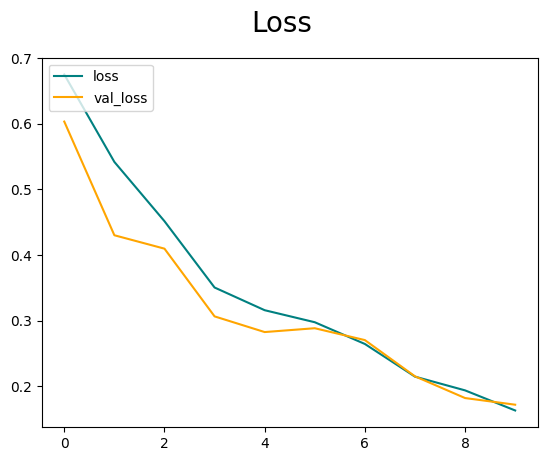

In [67]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

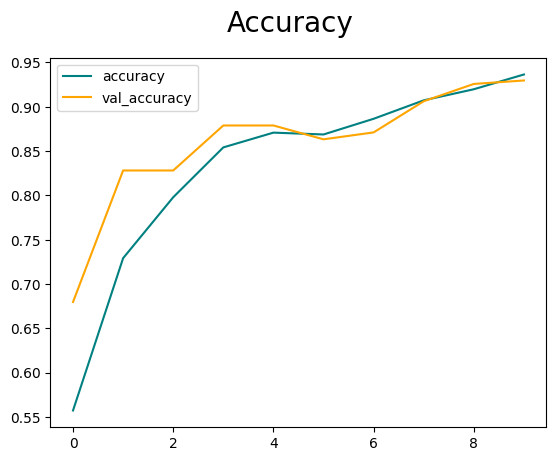

In [68]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [69]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [70]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [71]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [72]:
import cv2
from matplotlib import pyplot as plt

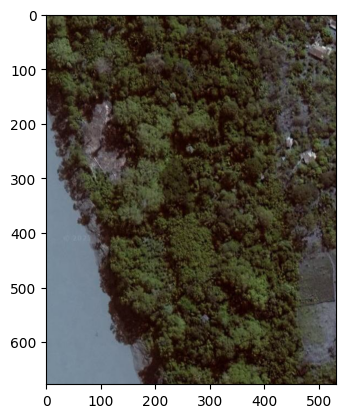

1/1 [==============================] - 0s 17ms/step


array([[0.9919255]], dtype=float32)

In [97]:
img = cv2.imread('01.png')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat



In [98]:
if yhat < 0.9: 
    print(f'Predicted class is Changed')
else:
    print(f'Predicted class is Natural')

# array([[0.9919255]], dtype=float32)
# array([[0.9789604]], dtype=float32)


Predicted class is Natural


In [99]:
model.save('model.keras')